In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_json('data/Luxury_Beauty_5.json', lines=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         34278 non-null  int64  
 1   verified        34278 non-null  bool   
 2   reviewTime      34278 non-null  object 
 3   reviewerID      34278 non-null  object 
 4   asin            34278 non-null  object 
 5   style           16841 non-null  object 
 6   reviewerName    34278 non-null  object 
 7   reviewText      34265 non-null  object 
 8   summary         34263 non-null  object 
 9   unixReviewTime  34278 non-null  int64  
 10  vote            6532 non-null   float64
 11  image           617 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.9+ MB


In [ ]:
# change time from obj to datetime
# vote of review usefulness is abysmally low -- Only 19% of reviews have a helpfulness score

### EDA
* count unique ASIN -- show num unique beauty items
* count unique reviewerID -- show num unique users
* time frame -- min and max
* distribution of ratings

In [32]:
df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'],unit='s')
df['unixReviewTime'] = df['unixReviewTime'].dt.year

In [26]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%Y%m%d', errors='ignore')
print(df['reviewTime'].min())
print(df['reviewTime'].max())
df.info()

2005-09-20 00:00:00
2018-09-24 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         34278 non-null  int64         
 1   verified        34278 non-null  bool          
 2   reviewTime      34278 non-null  datetime64[ns]
 3   reviewerID      34278 non-null  object        
 4   asin            34278 non-null  object        
 5   style           16841 non-null  object        
 6   reviewerName    34278 non-null  object        
 7   reviewText      34265 non-null  object        
 8   summary         34263 non-null  object        
 9   unixReviewTime  34278 non-null  int64         
 10  vote            6532 non-null   float64       
 11  image           617 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 2.9+ MB


In [10]:
df['asin'].value_counts()

B001MF3FMW    1221
B004N2S2JM     774
B003OGV7UO     774
B0013U0EYI     488
B0006PLMFQ     462
              ... 
B00172IENU       1
B000X1LR6W       1
B001541W7K       1
B00172WFZI       1
B00B59LCIE       1
Name: asin, Length: 1581, dtype: int64

In [12]:
# how many asins have only 1 review ---> 19
(df['asin'].value_counts() == 1).value_counts()

False    1562
True       19
Name: asin, dtype: int64

In [15]:
df['reviewerID'].value_counts()

AJL6HX8O2QLVO     127
A1O4PNHACFEDEM    125
A18VCM7Y7HK6EW    124
AJC7TSNP5UAWN     124
A2NT1LGR2BYP0I    124
                 ... 
A2TCHXH4SIN2OF      4
A2WWHOH10OM5OJ      4
AVLCKO0ZI8AG        4
A1DRM3JV6T5O6P      4
AQEJXZW1O9O7O       4
Name: reviewerID, Length: 3819, dtype: int64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


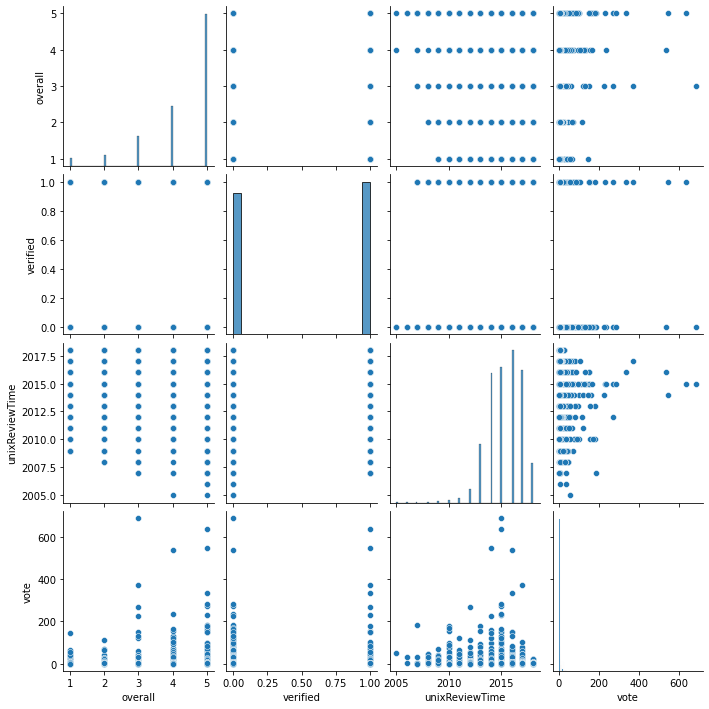

In [33]:
sns.pairplot(df)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


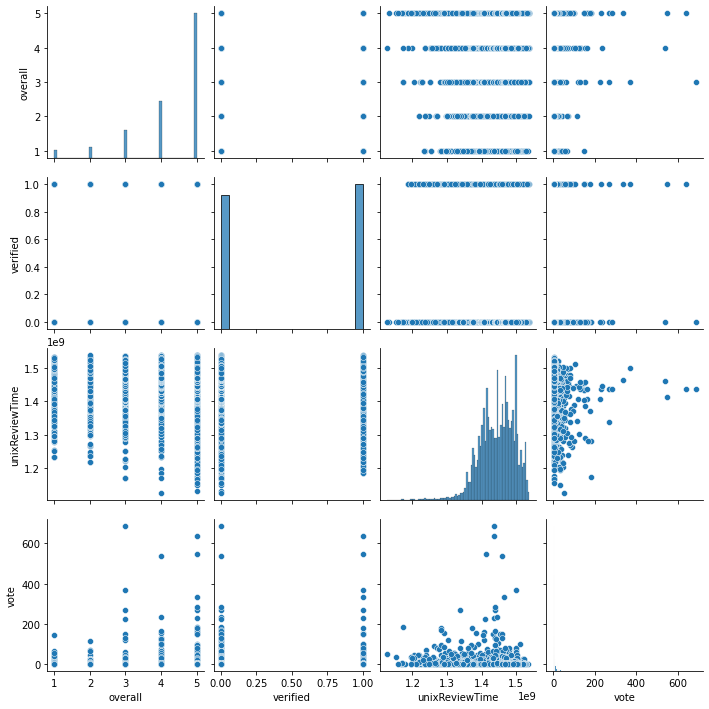

In [23]:
import seaborn as sns
sns.pairplot(df)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

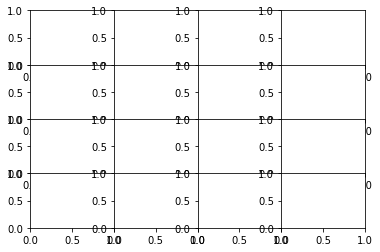

In [34]:
pd.plotting.scatter_matrix(df, alpha=0.2)